## Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

In [2]:
# load the dataset
data = pd.read_csv('TelcoCustomerChurn.csv')

In [3]:
# Display the first few rows to get an overview of the data we're dealing with
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2: Data Exploration

In [4]:
# Get summary statistics for numerical features
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Get counts for categorical features
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Step 3: Data Preprocessing

In [6]:
# Handle missing values if any (if needed)
data.dropna(inplace=True)

In [7]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data)

In [9]:
# Split data into features (X) and target (y)
X = data_encoded.drop('Churn_Yes', axis=1)  # Churn_Yes is the encoded target
y = data_encoded['Churn_Yes']

## Step 4: Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Building the Predictive Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
#INITIALIZE THE StandardScaler
scaler = StandardScaler()

In [24]:
#Fit and transform the training features (X train) with the scaler
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
#Transform the test features X test using the same scaler
X_test_scaled = scaler.transform(X_test)

In [28]:
# Train the Logistic Regression Model on the standardized trainin data
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Step 6: Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

/home/jhembe/anaconda3/envs/dataSceinceLearning/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1036
           1       0.79      0.51      0.62       373

    accuracy                           0.84      1409
   macro avg       0.82      0.73      0.76      1409
weighted avg       0.83      0.84      0.82      1409



In [34]:
confusion = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(confusion)


Confusion Matrix:
[[986  50]
 [181 192]]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

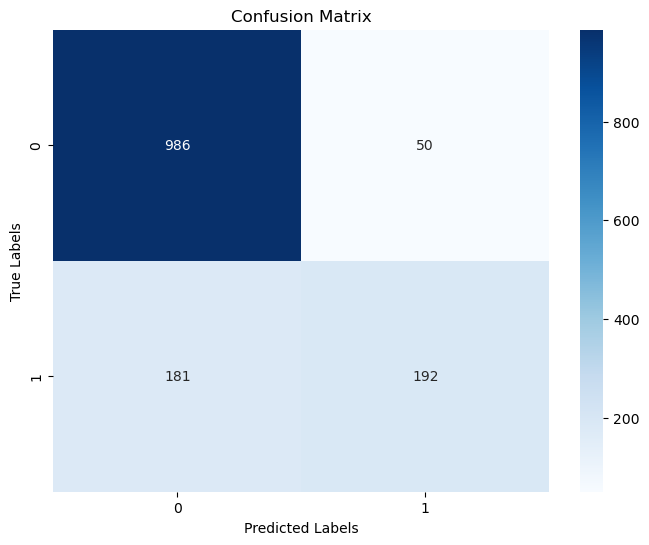

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Example: Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Step 7: Visualization

In [39]:
import matplotlib.pyplot as plt

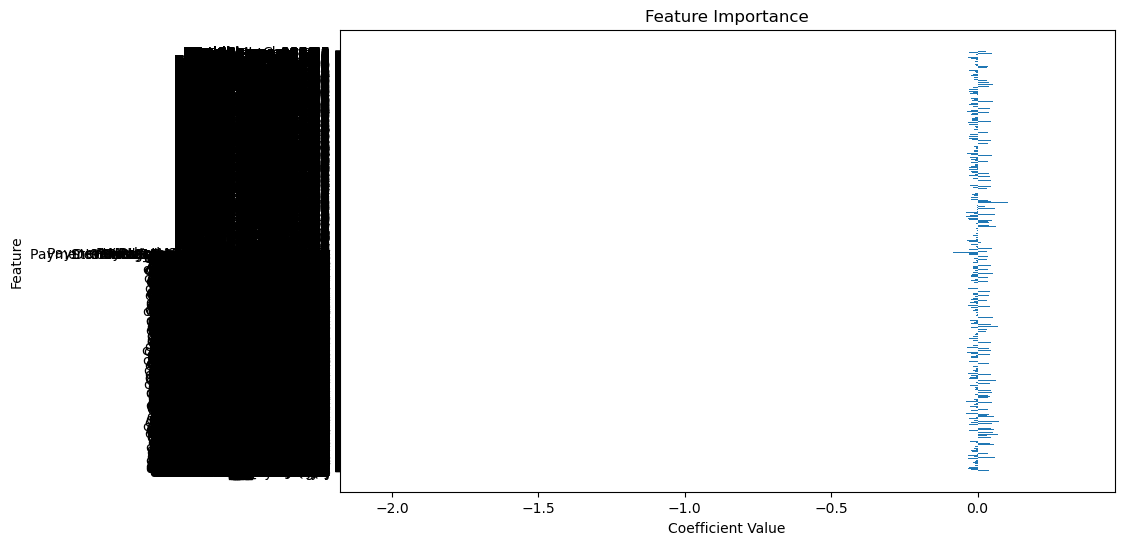

In [40]:
# Visualize feature importance (for a Logistic Regression model)
coefficients = model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Step 8: Model Deployement

In [41]:
import joblib

In [42]:
# Save the trained model to a file
joblib.dump(model, 'churn_trained_model.pkl')

['churn_trained_model.pkl']

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(data):
    # Create a copy of the input DataFrame to avoid modifying the original data
    processed_data = data.copy()

    # Identify categorical and numerical columns
    categorical_columns = processed_data.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = processed_data.select_dtypes(exclude=['object']).columns.tolist()

    # Encode categorical variables
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        processed_data[column] = label_encoders[column].fit_transform(processed_data[column])

    # Scale numerical features
    scaler = StandardScaler()
    processed_data[numerical_columns] = scaler.fit_transform(processed_data[numerical_columns])

    # Return the preprocessed data as a DataFrame
    return processed_data


In [55]:
# Create a deployement pipeline

import joblib

# Load the trained model
model = joblib.load('churn_trained_model.pkl')

# Create a function to make predictions on new data
def predict_new_data(new_data):
    # Preprocess the new data (similar to how training data was preprocessed)
    new_data_processed = preprocess_data(new_data)

    # Use the loaded model to make predictions
    predictions = model.predict(new_data_processed)

    return predictions


In [56]:
# now, let's predict stuffs through our csv

In [57]:
import pandas as pd

In [58]:
#read the csv file into a DataFrame
new_data_df = pd.read_csv('TelcoCustomerTest.csv')

In [60]:
new_data_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEH,Female,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDF,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [61]:
preprocess_data(new_data_df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0.0,1,1,-1.0,0,1,0,0,1,0,0,0,0,0,1,0,-1.0,-1.0
1,0,1,0.0,0,0,1.0,1,0,0,1,0,1,0,0,0,1,0,1,1.0,1.0


In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_new_data(new_data, label_encoders=None, scaler=None):
    if label_encoders is None:
        label_encoders = {}  # Initialize an empty dictionary if label_encoders is None

    # Create a copy of the input DataFrame to avoid modifying the original data
    processed_data = new_data.copy()

    # Identify categorical and numerical columns
    categorical_columns = processed_data.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = processed_data.select_dtypes(exclude=['object']).columns.tolist()

    # Apply label encoding to categorical variables using existing or new label encoders
    for column in categorical_columns:
        if column in label_encoders:
            # Use existing label encoder
            processed_data[column] = label_encoders[column].transform(processed_data[column])
        else:
            # Create a new label encoder and fit-transform the column
            label_encoders[column] = LabelEncoder()
            processed_data[column] = label_encoders[column].fit_transform(processed_data[column])

    # Apply scaling to numerical features using the provided or new scaler
    if scaler:
        processed_data[numerical_columns] = scaler.transform(processed_data[numerical_columns])

    # Return the preprocessed data as a DataFrame and label encoders
    return processed_data, label_encoders


In [68]:
# Read the CSV file into a DataFrame
new_data_df = pd.read_csv('TelcoCustomerTest.csv')

# Preprocess the new data and obtain label encoders and scaler
new_data_processed, label_encoders = preprocess_new_data(new_data_df)

# Use the loaded model to make predictions
predictions = model.predict(new_data_processed)

# The 'predictions' variable now contains the predicted churn labels (0 or 1) for the new data


/home/jhembe/anaconda3/envs/dataSceinceLearning/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 20 features, but LogisticRegression is expecting 13619 features as input.